# Analisi di un catalogo di ammassi di galassie

L'esercizio consiste nell'analizzare un catalogo di ammassi di galassie (`euclid_clusters.csv`) con caratteristiche simili a quelli che saranno osservati dalla missione Euclid. Il catalogo fornisce la massa (in masse solari) per ogni ammasso, per tre bin di redshift, ed il volume di universo associato a ciascun bin (in ${Mpc}^3/h^3$).

### Pacchetti e librerie utilizzati

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Parte uno: visualizzazione e analisi dei dati

_Scaricare il catalogo degli ammassi di galassie e analizzarne i dati, prestando particolare attenzione alla distribuzione delle masse degli ammassi. Si suggerisce di utilizzare scale logaritmiche per verificare la distribuzione dei dati._

Per prima cosa importo i dati del catalogo su un dataframe.

Analizzo numericamente i dati all'interno del dataframe tramite i comandi `.groupby()` e `.describe()`; in questo modo ricavo le medie, le deviazioni standard, i percentili e valori massimi e minimi per ogni bin di redshift.

Successivamente visualizzo i dati tramite degli istogrammi in cui i conteggi seguono una scala logaritmica. Come prima, considero separatamente i tre bin di redshift tramite una tecnica di group-by.

Il **titolo** dei vari istogrammi corrisponde al **redshift** considerato.

In [51]:
# importing data-frame 
euclid_clusters = pd.read_csv("euclid_clusters.csv", index_col = 0)

# analyzing data-frame
euclid_clusters.groupby('z')['mass'].describe()

,count,mean,std,min,25%,50%,75%,max
z,,,,,,,,
0.506,168897.0,1.754502e+14,1.022009e+14,1.000004e+14,1.162374e+14,1.417421e+14,1.942476e+14,2.231156e+15
1.019,142007.0,1.520161e+14,6.478489e+13,1.000036e+14,1.120814e+14,1.307558e+14,1.668826e+14,1.536768e+15
1.500,51733.0,1.370772e+14,4.304113e+13,1.000017e+14,1.093389e+14,1.230673e+14,1.487753e+14,9.605430e+14


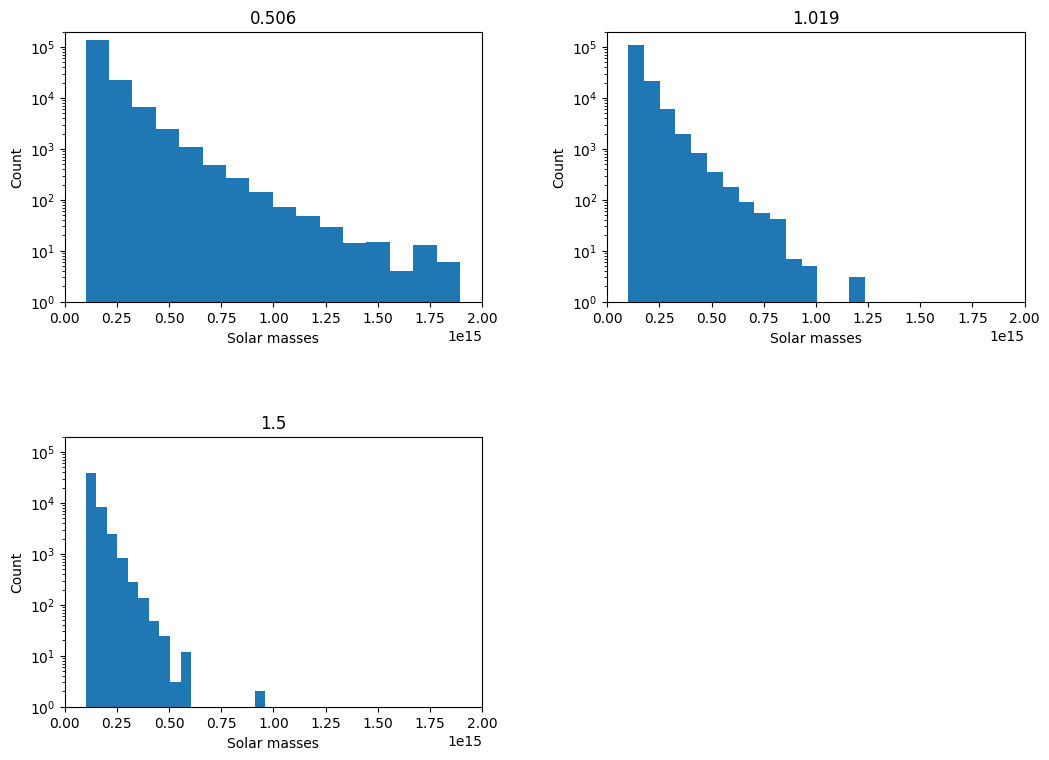

In [53]:
# drawing histograms
axes = euclid_clusters.hist(['mass'], by = 'z', xrot = 0, figsize = (12, 9), bins = 'sturges', log = True)
for ax in axes.flatten():
    ax.set(xlabel = 'Solar masses', xlim = (0, 2e15), ylabel = 'Count', ylim = (1, 2e5))

## Parte due: analisi della Halo Mass Function (HMF)